<!--Header-->
<div>
    <div class="row" style="color: #4D4D4D;font-size: 15px;padding-bottom: 20px">
        <div class="col-md-7">
            <img src="http://materials.cv.uoc.edu/cdocent/common/img/logo-uoc.png" alt="Logo UOC" class="img-responsive" style="margin:20px 0px 0px">
        </div>
        <div class="col-md-5">
            <h1 style="margin:15px 0px 0px;font-size: 40px;">Modelado de datos. Clustering de aprendizaje no supervisado</h1>
            <div style="text-align:left;margin-top: 5px;"></div>
        </div>
    </div>
    <div class="row" style="background: #FCB517;padding: 10px 20px;">
        <div class="col-md-6">
            <div>Trabajo Final de Máster</div>
        </div>
        <div class="col-md-6">
            <div style="text-align:right;">Autor: Lissette Muñoz Guillen <span style="margin-left: 30px;">Profesor: 
Laia Subirats Maté</span></div>
        </div>
    </div>
</div>
<!--/Header-->

## Introducción

En esta sección generaremos el modelo sobre los datos limpios extraidos en la sección "Limpieza y análisis de datos estadísticos", siendo este el paso más importante de nuestro estudio. 
Esta sección incluye:
 - Carga de datos pre-procesados
 - Creación del modelo k-means incluye todo su proceso.
 - Normalización de los datos
 - Reducción de dimensionalidad PCA
 - Gráfica de los clusters obtenidos
 - Análisis del modelo generado


Lo primero que haremos será importar todas las librerias necesarias para nuestra modelado, gráficos y análisis.

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
import seaborn as sns

# Modelado
# ================================================
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing 
from sklearn.metrics import silhouette_score, silhouette_samples

# Gráficos
# ================================================

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
import matplotlib.pyplot as plt

# Configuración warnings
# ==================================================
import warnings
warnings.filterwarnings('ignore')

## Carga de datos pre-procesados.

In [2]:
data_score = pd.read_csv('../conjunto_datos/df_score.csv', sep=';')
data_score.head(10)

,Id,intentos_tot,intentos_incom,nota_media,nota_media_,n_diez
0,2032,1,1,0.00,0.00,0
1,2213,7,3,4.88,4.88,0
2,2215,13,6,7.21,7.21,1
3,2217,8,3,5.60,5.60,0
4,2218,29,15,6.18,6.18,0
5,2219,27,12,5.40,5.40,2
6,2220,19,2,8.06,8.06,4
7,2221,16,2,7.89,7.89,3
8,2222,25,16,8.61,8.61,0
9,2243,15,9,5.83,5.83,0


In [3]:
#Pasamos a un nuevo dataframe las columnas que son de nuestro interes para el análsis, es decir, sin el id del estudiante
dataF=data_score.iloc[:, [1,2,3,4,5]]
dataF.head()

,intentos_tot,intentos_incom,nota_media,nota_media_,n_diez
0,1,1,0.00,0.00,0
1,7,3,4.88,4.88,0
2,13,6,7.21,7.21,1
3,8,3,5.60,5.60,0
4,29,15,6.18,6.18,0


## Aprendizaje no supervisado k-means

Para nuestro clustering utilizaremos todas las variables de nuestro conjunto de datos. Primero estimaremos el número de clusters a detectar por *k-means*.
Una técnica para estimar $k$ es, como se explica en la teoría:
> Los criterios anteriores (minimización de distancias intra grupo o maximización de distancias inter grupo) pueden usarse para establecer un valor adecuado para el parámetro k. Valores k para los que ya no se consiguen mejoras significativas en la homogeneidad interna de los segmentos o la heterogeneidad entre segmentos distintos, deberían descartarse.

Lo que popularmente se conoce como *regla del codo*.

Primero es necesario calcular la suma de los errores cuadráticos, que consiste en la suma de todos los errores (distancia de cada punto a su centroide asignado) al cuadrado.

$$SSE = \sum_{i=1}^{K} \sum_{x \in C_i} euclidean(x, c_i)^2$$

Donde $K$ es el número de clusters a buscar por *k-means*, $x \in C_i$ son los puntos que pertenecen a i-ésimo cluster, $c_i$ es el centroide del cluster $C_i$ (al que pertenece el punto $x$), y $euclidean$ es la distancia euclidea.

Este procedimiento realizado para cada posible valor $k$, resulta en una función monótona decreciente, donde el eje $x$ representa los distintos valores de $k$, y el eje $y$ el $SSE$. Intuitivamente se podrá observar un significativo descenso del error, que indicará el valor idóneo de $k$.

**Con la ayuda de la librería ```matplotlib``` y la implementación en scikit-learn de [*k-means*] armaremos nuestro modelo inicial.**

In [4]:
Nc = range(1, 10)

#Hacemos uso de la libreria
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(dataF).score(dataF) for i in range(len(kmeans))]
#Observamos los scores
score


[-46112.099694827586,
 -19163.24382894851,
 -11332.213224338626,
 -7922.454213020591,
 -6615.375667346696,
 -5370.919879148578,
 -4539.212536548069,
 -3823.957090970913,
 -3448.203403737945]

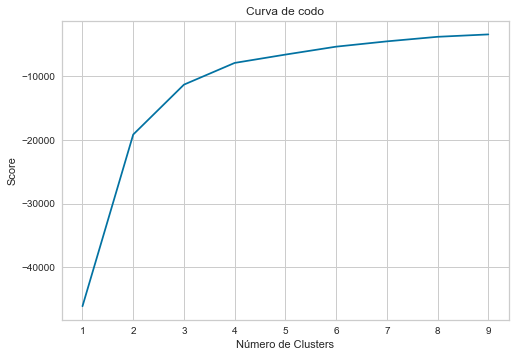

In [5]:
#Graficamos
plt.plot(Nc,score)
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Curva de codo')
plt.show()

<div style="background-color: #F4F6F6;">
Se puede observar que el codo de la curva se encuentra entre los valores 3 y 4, es decir, a partir de ese valor que empieza a estabilizarse la curva.
    
Para mejorar la elección de `k` vamos a utilizar un nuevo rango más pequeño y visualizamos la curva.
    
</div>

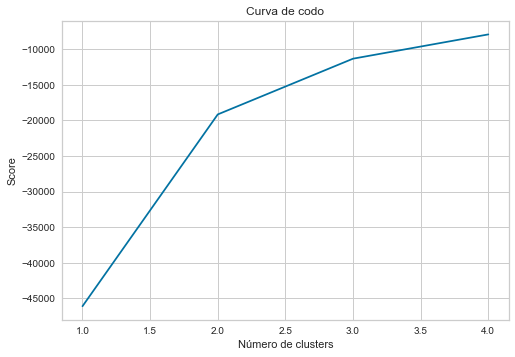

In [6]:
#Nuevo rango
Nc = range(1, 5)
#Hacemos uso de la libreria
kmeans = [KMeans(n_clusters=i) for i in Nc]

score = [kmeans[i].fit(dataF).score(dataF) for i in range(len(kmeans))]

#Graficamos
plt.plot(Nc,score)
plt.xlabel('Número de clusters')
plt.ylabel('Score')
plt.title('Curva de codo')
plt.show()

Como era de esperarse, el valor presenta su primer codo en 2 y empieza a estabilizarse en 3. Para ser más precisos en nuestra elección vamos a utilizar la técnica de la silueta nos da una puntuación y un número de k más exacto.

In [7]:
# Buscamos el número de clusters con  el método Silhouette
limit = int((dataF.shape[0]//2)**0.5)
  
# using silhouette score method
for k in range(2, limit+1):
    model = KMeans(n_clusters=k)
    model.fit(dataF)
    pred = model.predict(dataF)
    score = silhouette_score(dataF, pred)
    print('Valor de silhouette para k = {}: {:<.3f}'.format(k, score))

Valor de silhouette para k = 2: 0.643
Valor de silhouette para k = 3: 0.541
Valor de silhouette para k = 4: 0.406
Valor de silhouette para k = 5: 0.373
Valor de silhouette para k = 6: 0.372
Valor de silhouette para k = 7: 0.376
Valor de silhouette para k = 8: 0.371
Valor de silhouette para k = 9: 0.352
Valor de silhouette para k = 10: 0.348


De acuerdo a los datos anteriores el valor de K es más alto en 2 y 3. Para visualizar estos datos vamos a graficar el método Silhouette con 2, 3 y 4 clusters.

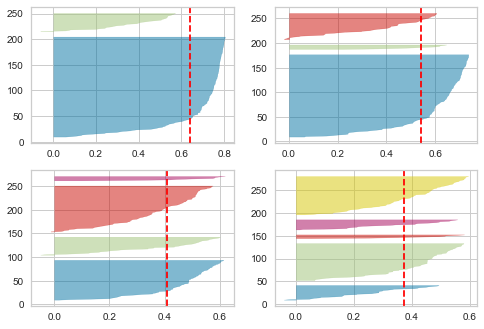

In [8]:
# Grafica Silhouette con 2, 3 y 4 clusters
fig, ax = plt.subplots(2,2)
for i in [2, 3, 4,5]:
    cont = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(cont, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(dataF)

Comenzamos con `k=3` y creamos nuestro modelo con la función `KMeans` y aplicamos a nuestros datos con la función `fit`

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> Kmeans con las variables originales
</div>

In [9]:
#guardamos la data inicial
data_origen=dataF.copy()
#Con k=3
ModeloKmeans = KMeans(n_clusters=3, max_iter=300).fit(dataF)


#### Agregamos la clasificación a los datos originales

In [10]:
#Creamos la nueva variable y agregamos
dataF['kMeans_cluster']=ModeloKmeans.labels_
#Visualizamos
dataF.head()

,intentos_tot,intentos_incom,nota_media,nota_media_,n_diez,kMeans_cluster
0,1,1,0.00,0.00,0,0
1,7,3,4.88,4.88,0,0
2,13,6,7.21,7.21,1,0
3,8,3,5.60,5.60,0,0
4,29,15,6.18,6.18,0,2


In [11]:
#Creamos los centroides
centroids = ModeloKmeans.cluster_centers_

#Visualizamos los centros
centroids

array([[ 8.77710843,  3.78313253,  5.17746988,  5.24783133,  0.07228916],
       [50.4       , 34.5       ,  6.557     ,  6.651     ,  1.        ],
       [24.75      , 11.25      ,  6.76589286,  6.80589286,  1.19642857]])

Grafiquemos ahora el modelo en base a dos primeras variables: Intentos totales y la nota media

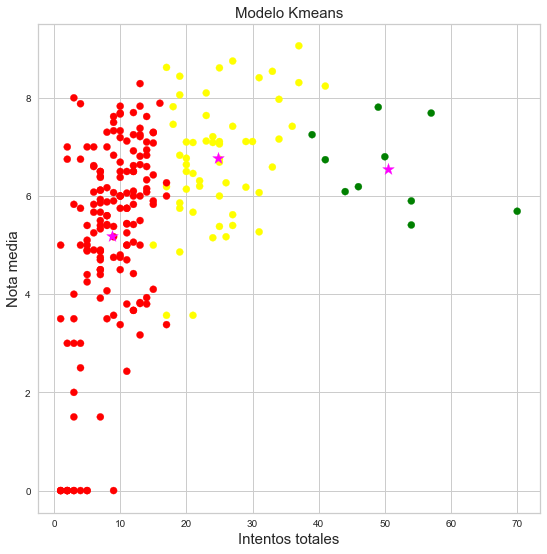

In [12]:
fig=plt.figure(figsize=(9,9))

ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Intentos totales', fontsize=15)
ax.set_ylabel('Nota media', fontsize=15)
ax.set_title('Modelo Kmeans', fontsize=15)

color=np.array(['red','green','yellow'])
ax.scatter(x=dataF.intentos_tot, y=dataF.nota_media,
           c=color[dataF.kMeans_cluster], s=50)
ax.scatter(centroids[:, 0], centroids[:, 2], marker='*', c='fuchsia', s=150)

plt.show()

Grafiquemos ahora el modelo con las variables: Intentos totales y la número de 10

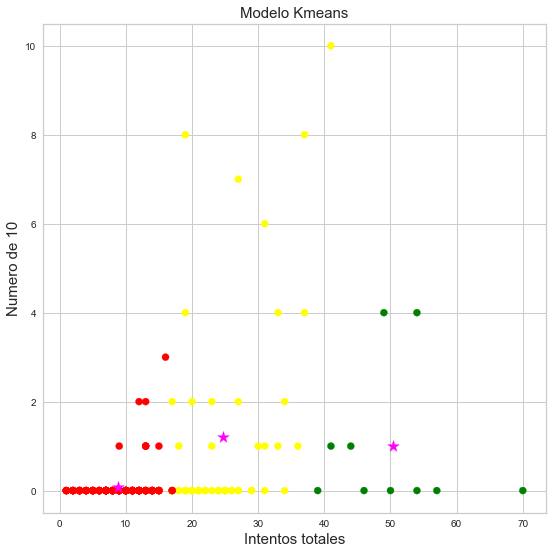

In [13]:
fig=plt.figure(figsize=(9,9))

ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Intentos totales', fontsize=15)
ax.set_ylabel('Numero de 10', fontsize=15)
ax.set_title('Modelo Kmeans', fontsize=15)

color=np.array(['red','green','yellow'])
ax.scatter(x=dataF.intentos_tot, y=dataF.n_diez,
           c=color[dataF.kMeans_cluster], s=50)
ax.scatter(centroids[:, 0], centroids[:, 4], marker='*', c='fuchsia', s=150)

plt.show()

Grafiquemos ahora el modelo con las variables: Intentos totales e intentos incompletos

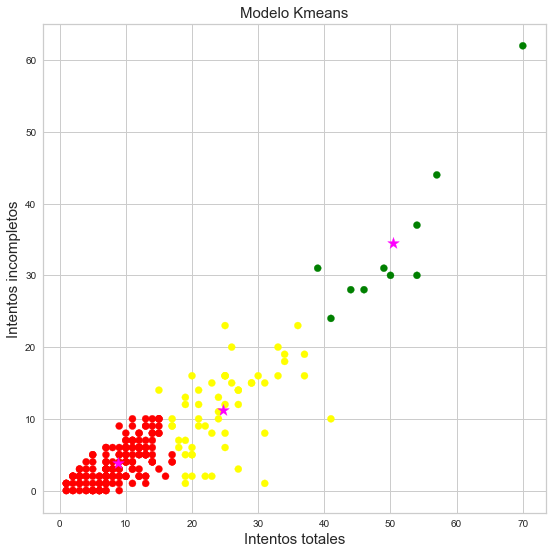

In [14]:
fig=plt.figure(figsize=(9,9))

ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Intentos totales', fontsize=15)
ax.set_ylabel('Intentos incompletos', fontsize=15)
ax.set_title('Modelo Kmeans', fontsize=15)

color=np.array(['red','green','yellow'])
ax.scatter(x=dataF.intentos_tot, y=dataF.intentos_incom,
           c=color[dataF.kMeans_cluster], s=50)
ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='fuchsia', s=150)

plt.show()

Una vez realizado este análisis. Para poder abarcar todas las variables en el gráfico y ver los resultados de nuestro modelo, aplicaremos un PCA al conjunto de datos y graficamos sobre el resultado.

### Gráfica en base a componentes principales PCA

### Normalización de los datos.

Este paso es importante porque el algoritmo PCA se basa en la varianza de cada característica.

In [15]:
min_max_scaler = preprocessing.MinMaxScaler() 

# Escalamos los datos iniciales y se normalizan
dataFNor= min_max_scaler.fit_transform(data_origen) 

dataFNor #Datos normalizados

array([[0.        , 0.01612903, 0.        , 0.        , 0.        ],
       [0.08695652, 0.0483871 , 0.53863135, 0.53863135, 0.        ],
       [0.17391304, 0.09677419, 0.79580574, 0.79580574, 0.1       ],
       ...,
       [0.08695652, 0.03225806, 0.5187638 , 0.5187638 , 0.        ],
       [0.        , 0.        , 0.55187638, 0.55187638, 0.        ],
       [0.07246377, 0.03225806, 0.73068433, 0.73068433, 0.        ]])

Para el cálculo optimo de componentes vamos a evaluar la proporción de varianza explicada acumulada.

Eigenvectors 
[0.10436245 0.03293175 0.01460282 0.00151738 0.00036228]

Eigenvalues 
[[ 0.31325053  0.69550014  0.06332535  0.64061972 -0.06123683]
 [ 0.16729737  0.58952231  0.26461291 -0.74178348  0.06490242]
 [ 0.6500796  -0.27047138  0.08440689 -0.09930319 -0.69803732]
 [ 0.64646989 -0.26334877  0.08569346  0.0292249   0.71030039]
 [ 0.18264419  0.16197429 -0.95472615 -0.16925849  0.01596805]]


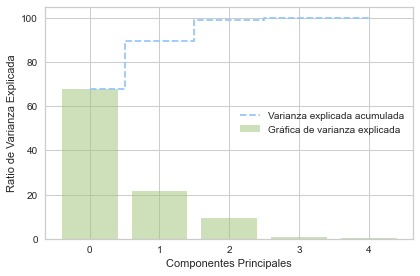

In [16]:
#Calculamos los autovalores y autovectores de los datos normalizados
mat = np.cov(dataFNor.T)
eig_v, eig_vec = np.linalg.eig(mat)

print('Eigenvectors \n%s' %eig_v)
print('\nEigenvalues \n%s' %eig_vec)

# A partir de los autovalores, calculamos la varianza explicada
valores = sum(eig_v)
varExpl = [(i / valores)*100 for i in sorted(eig_v, reverse=True)]
cum = np.cumsum(varExpl)
cum
# Representamos en un diagrama de barras la varianza explicada por cada autovalor, y la acumulada
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(6, 4))
        
    plt.bar(range(5), varExpl, alpha=0.5, align='center', label='Gráfica de varianza explicada', color='g')
    plt.step(range(5), cum, where='mid', linestyle='--', label='Varianza explicada acumulada')
    plt.ylabel('Ratio de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.legend(loc='best')
    plt.tight_layout()


Instanciamos objeto PCA a 2 componentes considerando una gráfica en 2 dimensiones y aplicamos a nuestros datos normalizados.

In [17]:
pca=PCA(n_components=2) 
pca_notas=pca.fit_transform(dataFNor) # Obtenemos los componentes principales y entrenamos el modelo

#Mostramos los resultados de los dos componentes
pca_results=pd.DataFrame(pca_notas, columns=['Componente1', 'Componente2'])
print(pca_results)

     Componente1  Componente2
0       0.892789     0.135275
1       0.161791    -0.072763
2      -0.225247    -0.104847
3       0.054214    -0.105106
4      -0.156505     0.186495
..           ...          ...
227     0.245739     0.102877
228     0.011446    -0.112095
229     0.190249    -0.071665
230     0.179952    -0.168837
231    -0.079977    -0.194872

[232 rows x 2 columns]


In [18]:
#obtenemos la varianza explicada
expl = pca.explained_variance_ratio_
print(expl)
print('Suma:',round(sum(expl[0:5]),2))

[0.67866239 0.2141531 ]
Suma: 0.89


Ahora, concateno los componentes obtenidos con el resulado del modelo kmeans obtenido previamente

In [19]:
dataScoreF=pd.concat([pca_results, dataF[['kMeans_cluster']]], axis=1)
#visualizamos
dataScoreF.head()

,Componente1,Componente2,kMeans_cluster
0,0.892789,0.135275,0
1,0.161791,-0.072763,0
2,-0.225247,-0.104847,0
3,0.054214,-0.105106,0
4,-0.156505,0.186495,2


<div style="background-color: #F4F6F6;">
Ahora, realizamos la predicción para obtener los labels de nuestro modelo y graficamos.  
En nuestra gráfica vamos agregar los centroides con una estrella azul, esto no permite observar como se distribuyen los valores al rededor de los centros.
</div>

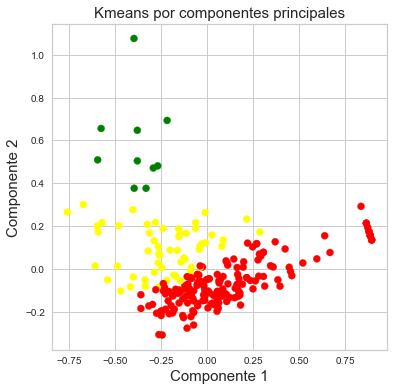

In [20]:
fig=plt.figure(figsize=(6,6))

ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize=15)
ax.set_ylabel('Componente 2', fontsize=15)
ax.set_title('Kmeans por componentes principales', fontsize=15)

color=np.array(['red','green','yellow'])
ax.scatter(x=dataScoreF.Componente1, y=dataScoreF.Componente2,
           c=color[dataScoreF.kMeans_cluster], s=50)

plt.show()


### Creación de kMeans con PCA

Al reducir la cantidad de características mediante el PCA, intentaremos mejorar el rendimiento de nuestro algoritmo. Además, al disminuir el número de características, también se reduce el ruido.

A continuación, crearemos un PCA con todos los componentes principales y así nos aseguramos de no perder datos, posteriormente modelamos el kMeans con los componentes obtenidos y finalmente graficamos el resultado.

In [21]:
pca=PCA(n_components=5) 
pca_notas=pca.fit_transform(dataFNor) # Obtenemos los componentes principales y entrenamos el modelo

#Mostramos los resultados de los dos componentes
pca_scores=pd.DataFrame(pca_notas, columns=['Componente1', 'Componente2', 'Componente3', 'Componente4', 'Componente5'])
print(pca_scores)

     Componente1  Componente2  Componente3  Componente4  Componente5
0       0.892789     0.135275     0.107046    -0.004196    -0.007512
1       0.161791    -0.072763     0.001382    -0.010165    -0.004138
2      -0.225247    -0.104847     0.034799    -0.025300    -0.001572
3       0.054214    -0.105106    -0.013054    -0.006450    -0.004051
4      -0.156505     0.186495    -0.094432     0.040464    -0.009341
..           ...          ...          ...          ...          ...
227     0.245739     0.102877     0.001237     0.073965     0.074858
228     0.011446    -0.112095    -0.022579    -0.020580    -0.002625
229     0.190249    -0.071665     0.009029     0.003191    -0.005428
230     0.179952    -0.168837     0.017439    -0.030907    -0.001791
231    -0.079977    -0.194872    -0.026101    -0.020944    -0.001942

[232 rows x 5 columns]


In [22]:
#obtenemos la varianza explicada
expl = pca.explained_variance_ratio_
print(expl)
print('Suma:',round(sum(expl[0:5]),2))

[0.67866239 0.2141531  0.09496124 0.00986741 0.00235587]
Suma: 1.0


Ahora, incorporaremos las puntuaciones obtenidas en el PCA en el algorimo K-means y graficamos los resultados.

In [23]:
#Con k=3
ModeloKmeansPCA = KMeans(n_clusters=3, max_iter=300).fit(pca_scores)
#Creamos la nueva variable y agregamos
pca_scores['kMeans_cluster']=ModeloKmeansPCA.labels_
#Visualizamos
pca_scores.head()

,Componente1,Componente2,Componente3,Componente4,Componente5,kMeans_cluster
0,0.892789,0.135275,0.107046,-0.004196,-0.007512,1
1,0.161791,-0.072763,0.001382,-0.010165,-0.004138,2
2,-0.225247,-0.104847,0.034799,-0.025300,-0.001572,2
3,0.054214,-0.105106,-0.013054,-0.006450,-0.004051,2
4,-0.156505,0.186495,-0.094432,0.040464,-0.009341,2


In [24]:
#Creamos los nuevos centroides
centroids = ModeloKmeansPCA.cluster_centers_

#Visualizamos los centros
centroids

array([[-4.36504520e-01,  2.81655350e-01,  7.58971673e-02,
        -1.04717386e-02, -6.52169635e-04],
       [ 5.25831499e-01,  8.91297218e-02,  4.49169589e-02,
        -2.04906077e-03,  6.92528068e-04],
       [-5.49411136e-02, -7.29773070e-02, -2.49544023e-02,
         2.39315995e-03, -5.85230333e-05]])

Graficamos nuestros clusters teniendo como ejes los componentes 1 y 2

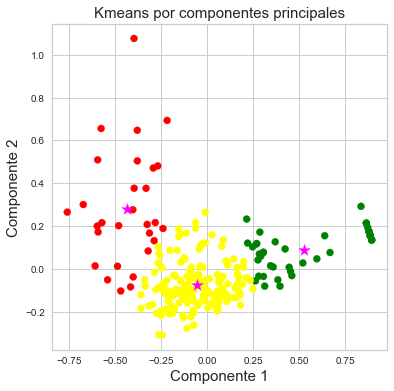

In [25]:
fig=plt.figure(figsize=(6,6))

ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize=15)
ax.set_ylabel('Componente 2', fontsize=15)
ax.set_title('Kmeans por componentes principales', fontsize=15)

color=np.array(['red','green','yellow'])
ax.scatter(x=pca_scores.Componente1, y=pca_scores.Componente2,
           c=color[pca_scores.kMeans_cluster], s=50)
ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='fuchsia', s=150)

plt.show()

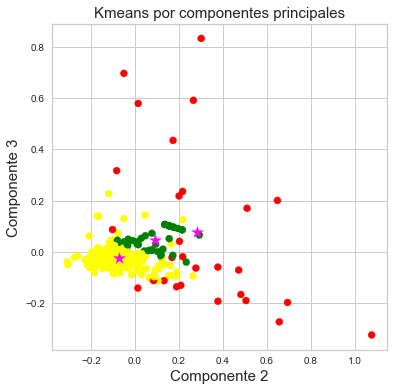

In [26]:
fig=plt.figure(figsize=(6,6))

ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 2', fontsize=15)
ax.set_ylabel('Componente 3', fontsize=15)
ax.set_title('Kmeans por componentes principales', fontsize=15)

color=np.array(['red','green','yellow'])
ax.scatter(x=pca_scores.Componente2, y=pca_scores.Componente3,
           c=color[pca_scores.kMeans_cluster], s=50)
ax.scatter(centroids[:, 1], centroids[:, 2], marker='*', c='fuchsia', s=150)

plt.show()

In [27]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

Graficamos en tres dimensiones con los componentes 1 2 y 3

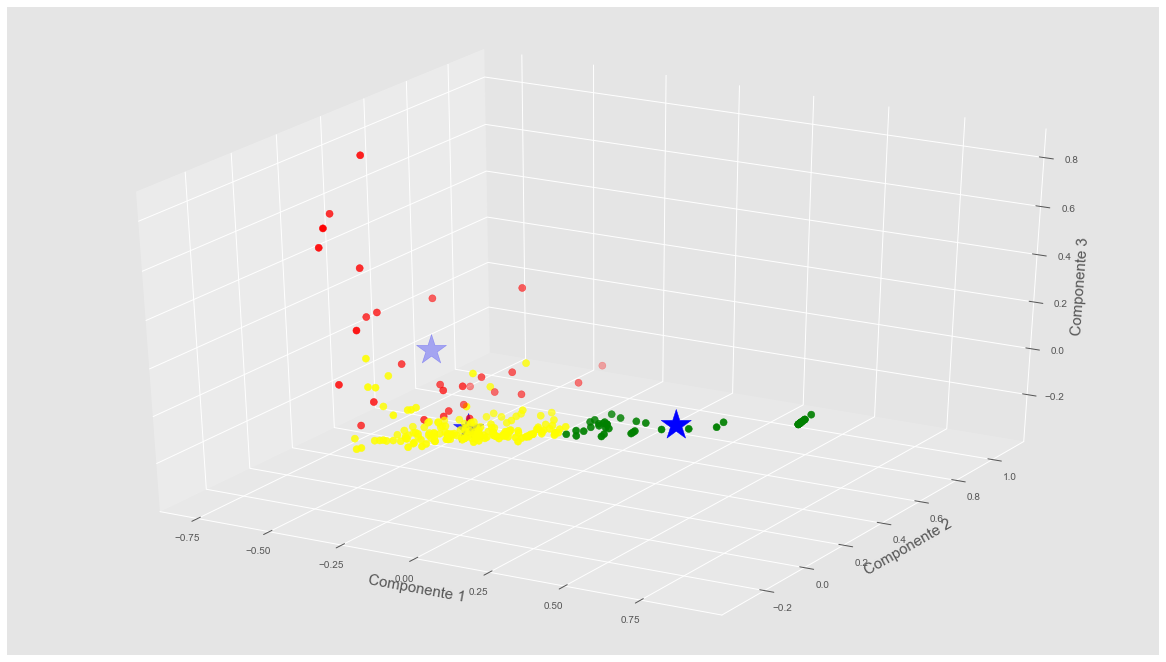

In [28]:
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel('Componente 1', fontsize=15)
ax.set_ylabel('Componente 2', fontsize=15)
ax.set_zlabel('Componente 3', fontsize=15)
color=np.array(['red','green','yellow'])
ax.scatter(pca_scores.Componente1, pca_scores.Componente2,  pca_scores.Componente3,
           c=color[pca_scores.kMeans_cluster], s=50)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='*', c="blue", s=1000)


#### Agregamos la nueva clasificación de k-Means con PCA a los datos originales

In [29]:
#Creamos la nueva variable y agregamos a nuestros datos originales que tienen el id del estudiante
data_score['kMeans_PCA_cluster']=ModeloKmeansPCA.labels_
#Visualizamos
data_score.head()

,Id,intentos_tot,intentos_incom,nota_media,nota_media_,n_diez,kMeans_PCA_cluster
0,2032,1,1,0.00,0.00,0,1
1,2213,7,3,4.88,4.88,0,2
2,2215,13,6,7.21,7.21,1,2
3,2217,8,3,5.60,5.60,0,2
4,2218,29,15,6.18,6.18,0,2


Con los datos y el resultado del cluster vamos agregar una columna adicional que corresponde a la fecha del examen, esto para realizar los análisis de los clusters. 

In [59]:
#Leer datos originales
data_cl = pd.read_csv('../conjunto_datos/_data.csv', sep=';')
data_cl.head(10)

,Id,Score,Date
0,3175,8.5,2020-03-30 18:35:15+02
1,3209,7.5,2020-03-30 17:16:20+02
2,3229,8.5,2020-03-30 11:23:42+02
3,3229,No terminado,2020-03-30 10:48:41+02
4,3229,No terminado,2020-03-30 10:47:22+02
5,3229,No terminado,2020-03-30 10:45:33+02
6,3250,No terminado,2020-03-30 00:18:22+02
7,3203,7.5,2020-03-29 23:46:41+02
8,3190,7.5,2020-03-29 23:08:47+02
9,3190,No terminado,2020-03-29 22:46:08+02


In [66]:
#Eliminar la fecha y mantener unicamente el año de la columna Date

data_cl["anioE"]=data_cl["Date"].str.split('-', expand=True)
data_cl= data_cl.drop(['Score','Date'], axis=1)
data_cl

,Id,anioE
0,3175,2020
1,3209,2020
2,3229,2020
3,3229,2020
4,3229,2020
...,...,...
3353,2220,2018
3354,2213,2018
3355,2222,2018
3356,2,2018


In [114]:
#creamos una copia
data_f=data_cl.copy()

#Agrupar y hacer un merge con los datos que contienen el resultados del cluster por el id del estudiante
df = data_score.merge (data_f.groupby ('Id') ['anioE']. apply (lambda x: x.reset_index (drop = True)). unstack (). reset_index ()).rename(columns={'kMeans_PCA_cluster':'cluster'})
data_score_f=df.iloc[:, [0,1,2,3,4,5,6,7]]
data_score_f


,Id,intentos_tot,intentos_incom,nota_media,nota_media_,n_diez,cluster,0
0,2032,1,1,0.00,0.00,0,1,2018
1,2213,7,3,4.88,4.88,0,2,2018
2,2215,13,6,7.21,7.21,1,2,2018
3,2217,8,3,5.60,5.60,0,2,2018
4,2218,29,15,6.18,6.18,0,2,2018
...,...,...,...,...,...,...,...,...
227,3262,17,5,3.38,4.50,0,1,2020
228,3279,8,4,5.88,5.88,0,2,2020
229,3280,7,2,4.70,4.70,0,2,2020
230,3281,1,0,5.00,5.00,0,2,2020


Grabamos el set de datos clusterizados

In [115]:
data_score_f.to_csv('data_score_cluster.csv',  sep=';', index=False)

## Análisis y descripción de los clusters obtenidos.

<!--Footer-->
 <div style="background: #333333;padding: 35px 0px;margin-top: 25px;">
    <div class="row">
     <div class="col-sm-12">
        <img src="http://materials.cv.uoc.edu/cdocent/common/img/logo-uoc-bottom.png" alt="Logo UOC" class="img-responsive" style="margin: 0 auto; display: block;">
    </div>
</div>
</div>
<!--/Footer-->